In [1]:
pip install geopandas

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 682.7 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.1 MB 3.3 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 3.3 MB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.1 MB 3.6 MB/s eta 0:00:01
   ------------------------ --------------- 0.7/1.1 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.1 MB 3.5 MB/s eta 0:00:01
   ----------------------------------- ---- 1.0/1.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ------------------

In [33]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import random
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [23]:
def generate_region_points(num_points):
    # Load world shapefile (use a detailed shapefile if needed)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Define regions and their respective countries
    regions = {
        "RUS": ["Russia", "Azerbaijan", "Armenia", "Georgia"],
        "CHN": ["China", "Taiwan", "Mongolia", "Hong Kong", "Macau"],
        "RSAF": ["Guinea", "Sierra Leone", "Uganda", "Mauritania", "Tanzania", "Malawi", "Angola", "Botswana", "Mozambique", "Namibia", "Lesotho", "Zambia", "Zimbabwe", "Eswatini"],
                 "MEX": ["Mexico"],
        "INDO": ["Indonesia", "Papua New Guinea", "Timor-Leste"],
        "JAP": ["Japan"],
        "RSAM": ["Guyana", "Chile", "Venezuela", "Colombia", "Ecuador", "Argentina", "Peru", "Uruguay", "Paraguay", "Suriname", "Bolivia", "French Guiana"],
        "WAF": ["Burkina Faso", "Nigeria", "Guinea", "Cabo Verde", "Chad", "Cote d'Ivoire", "Guinea-Bissau", "Central African Republic", "Mauritania", "Senegal", "Liberia", "Benin", "DR Congo", "Congo Republic", "Cameroon", "Gabon", "Ghana", "Mali", "Niger", "Equatorial Guinea", "Gambia", "Sierra Leone", "Togo", "St. Helena", "Sao Tome and Principe"],
        "UKR": ["Moldova", "Ukraine", "Belarus"],
        "INDIA": ["India"],
        "ME": ["Iran", "United Arab Emirates", "Yemen", "Saudi Arabia", "Iraq", "Oman", "Syria", "Jordan", "Bahrain", "Kuwait", "Qatar", "Israel", "Lebanon"],
        "WEU": ["Italy", "Norway", "France", "Spain", "Malta", "Sweden", "Finland", "Ireland", "Switzerland", "Germany", "Portugal", "Netherlands", "Denmark", "Liechtenstein", "Belgium", "Iceland", "Faroe Islands", "Austria", "San Marino", "Andorra", "Luxembourg", "Gibraltar", "Monaco", "Vatican", "United Kingdom"],
        "NAF": ["Algeria", "Egypt", "Tunisia", "Libya", "Morocco", "Western Sahara"],
        "KOR": ["South Korea", "North Korea"],
        "EAF": ["Uganda", "Seychelles", "Madagascar", "Sudan", "Burundi", "Mauritius", "Ethiopia", "Somalia", "South Sudan", "Kenya", "Eritrea", "Djibouti", "Rwanda", "Comoros", "Reunion"],
        "STAN": ["Kazakhstan", "Uzbekistan", "Kyrgyz Republic", "Tajikistan", "Turkmenistan"],
        "CEU": ["Slovenia", "Latvia", "North Macedonia", "Croatia", "Hungary", "Romania", "Kosovo", "Bulgaria", "Serbia", "Montenegro", "Bosnia and Herzegovina", "Estonia", "Poland", "Czechia", "Albania", "Lithuania", "Slovakia", "Cyprus"],
        "RCAM": ["Cuba", "Bahamas", "Dominican Republic", "Panama", "Honduras", "Guatemala", "Nicaragua", "Bermuda", "El Salvador", "Trinidad and Tobago", "Anguilla", "Belize", "Haiti", "Jamaica", "St. Kitts and Nevis", "Turks and Caicos Islands", "Barbados", "Costa Rica", "St. Lucia", "Dominica", "St. Vincent and the Grenadines", "Grenada", "Guadeloupe", "British Virgin Islands", "Puerto Rico", "Cayman Islands", "Montserrat", "United States Virgin Islands", "Aruba", "Curacao", "Martinique", "Sint Maarten"],
        "CAN": ["Canada"],
        "RSAS": ["Maldives", "Afghanistan", "Sri Lanka", "Bangladesh", "Bhutan", "Nepal"],
        "SAF": ["South Africa"],
        "BRA": ["Brazil", "BR-North-eastern grid", "BR-Northern grid", "BR-South-eastern/Mid-western grid", "BR-Southern grid", "BR-TO", "BR-BA", "BR-PI", "BR-AP", "BR-RS", "BR-PR", "BR-MG", "BR-SE", "BR-PA", "BR-PB", "BR-CE", "BR-AM", "BR-RO", "BR-RJ", "BR-DF", "BR-AC", "BR-SP", "BR-SC", "BR-MA", "BR-MS", "BR-MT", "BR-PE", "BR-ES", "BR-RR", "BR-RN", "BR-GO", "BR-AL"],
        "TUR": ["Turkey"],
        "OCE": ["Australia", "French Polynesia", "Solomon Islands", "Fiji", "New Zealand", "Kiribati", "Vanuatu", "Marshall Islands", "Micronesia, Fed. Sts.", "Palau", "Samoa", "Nauru", "Cook Islands", "Northern Mariana Islands", "New Caledonia", "Tonga", "Tuvalu", "American Samoa", "Tokelau", "Niue"],
        #Due to no USA data found, we ignore here
        #"USA": ["USA"],
        "SEAS": ["Laos", "Fiji", "Solomon Islands", "Afghanistan", "Philippines", "Thailand", "Vietnam", "Myanmar", "Malaysia", "Cambodia", "Singapore", "Brunei Darussalam"]
        }

    def generate_random_points(poly, num_points):
        min_x, min_y, max_x, max_y = poly.bounds
        points = []
        count = 0
        while len(points) < num_points:
            random_point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
            if random_point.within(poly):  # Ensuring the point is within the polygon
                points.append(random_point)
            count += 1
            if count > 10000:  # To avoid infinite loops for small or complex polygons
                break
        return points

    # Prepare DataFrame to store data
    columns = ['Short name', 'Latitude', 'Longitude']
    df1 = pd.DataFrame(columns=columns)

    # Generate points for each region
    for region, countries in regions.items():
        region_gdf = world[world['name'].isin(countries)]
        if not region_gdf.empty:
            region_poly = region_gdf.unary_union  # Merge all geometries into a single polygon
            if region_poly:  # Check if the unary union is not None
                points = generate_random_points(region_poly, num_points)
                # Collect data for each point
                temp_df = pd.DataFrame({
                    'Short name': [region] * len(points),
                    'Latitude': [point.y for point in points],
                    'Longitude': [point.x for point in points]
                })
                df1 = pd.concat([df1, temp_df], ignore_index=True)
            else:
                print(f"No valid geometry for region: {region}")
        else:
            print(f"No data found for region: {region}")

    # Additional US coordinate data points
    additional_data = {
        "Latitude": [45.807829, 41.136239, 36.670570, 42.587507, 42.770469, 32.869369, 36.434490, 33.545211, 38.138087,
                     41.528551, 38.162916, 38.439424, 45.609783, 46.068791, 36.497370, 32.482742, 37.853306, 34.759171,
                     37.716315, 31.927429, 41.477802, 45.082500, 39.504504, 32.359355, 38.458387, 33.789719, 45.455224,
                     29.668566, 35.043735, 35.778761],
        "Longitude": [-109.893191, -118.513366, -81.997825, -123.159697, -114.265284, -95.018497, -116.607157,
                      -116.346676, -114.529919, -113.225229, -75.897152, -101.659194, -107.540372, -110.384427,
                      -108.999016, -91.253774, -92.476445, -111.948201, -101.312317, -86.267520, -98.734401, -68.996042,
                      -84.194565, -86.756630, -115.105711, -103.501729, -103.458605, -81.776017, -95.559811, -97.813579],
        "Short name": ["USA"] * 30
    }
    df2 = pd.DataFrame(additional_data)

    # Combining the dataframes
    combined_df = pd.concat([df1, df2], ignore_index=True)
    return combined_df

C:\Users\89751\AppData\Local\Temp\ipykernel_7208\3147074011.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\89751\AppData\Local\Temp\ipykernel_7208\3147074011.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, temp_df], ignore_index=True)


    Short name   Latitude   Longitude
0          RUS  68.592138   28.958542
1          RUS  57.832187  158.433644
2          RUS  62.061663  135.290469
3          RUS  66.117619  179.072720
4          RUS  59.798295  113.551864
..         ...        ...         ...
775        USA  33.789719 -103.501729
776        USA  45.455224 -103.458605
777        USA  29.668566  -81.776017
778        USA  35.043735  -95.559811
779        USA  35.778761  -97.813579

[780 rows x 3 columns]


In [49]:
def check_coordinate_land_or_sea (df):
    # Load the world shapefile
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Convert DataFrame to GeoDataFrame with appropriate geometry column from latitude and longitude
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

    # Filter the world GeoDataFrame to include only land polygons
    land_polygons = world[world['continent'].notnull()]

    # Function to check if each point is on land
    def check_land(point, land_polygons):
        return any(land.contains(point) for land in land_polygons.geometry)

    # Identify points that are on land using the check_land function
    gdf['Location Type'] = gdf['geometry'].apply(lambda x: 'Land' if check_land(x, land_polygons) else 'Sea')

    return gdf

In [37]:
def df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [32]:
def csv_to_df(file_name):
    return pd.read_csv(file_name)

In [38]:

mileposts = pd.read_csv('C:/Users/89751/OneDrive/Desktop/test1.csv')

C:\Users\89751\AppData\Local\Temp\ipykernel_7208\867683418.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_regions))


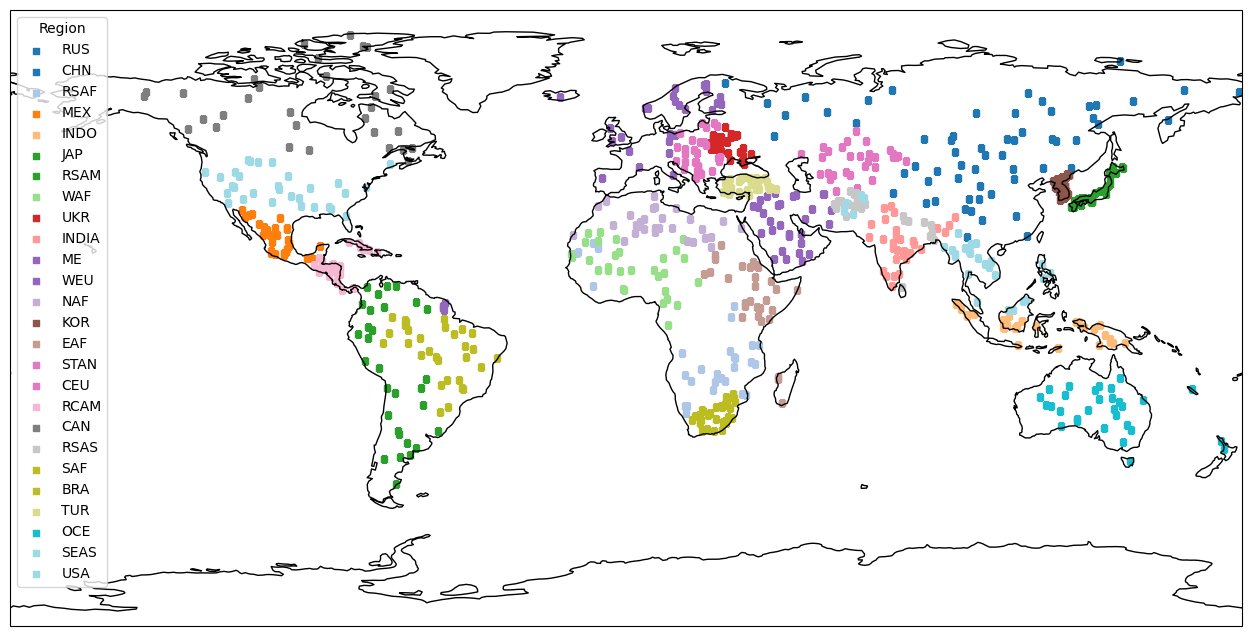

In [40]:
def generate_figure (file_name):

    # Prepare the figure
    fig_width = 16
    fig_height = 8  # Increased height for global view
    fig = plt.figure(figsize=(fig_width, fig_height))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_global()  # Set the view to global
    
    # Create a color map for the regions
    unique_regions = mileposts['Short name'].unique()
    colors = plt.cm.get_cmap('tab20', len(unique_regions))
    region_color = {region: colors(i) for i, region in enumerate(unique_regions)}
    
    # Plot each region with a different color
    for region, color in region_color.items():
        region_data = mileposts[mileposts['Short name'] == region]
        ax.scatter(region_data['Longitude'], region_data['Latitude'], color=color, s=25, marker='s', label=region)
    
    ax.coastlines()
    
    # Add a legend
    ax.legend(title='Region', loc='upper left')
    
    plt.show()
    
mileposts = pd.read_csv('C:/Users/89751/OneDrive/Desktop/test1.csv')
generate_figure (mileposts)

In [41]:
df = generate_region_points(num_points=30)
print(df)

C:\Users\89751\AppData\Local\Temp\ipykernel_7208\3147074011.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\89751\AppData\Local\Temp\ipykernel_7208\3147074011.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, temp_df], ignore_index=True)


    Short name   Latitude   Longitude
0          RUS  68.971603  161.160886
1          RUS  70.576647  135.408792
2          RUS  65.330545  144.224968
3          RUS  64.206571   78.760017
4          RUS  56.580304   62.499175
..         ...        ...         ...
775        USA  33.789719 -103.501729
776        USA  45.455224 -103.458605
777        USA  29.668566  -81.776017
778        USA  35.043735  -95.559811
779        USA  35.778761  -97.813579

[780 rows x 3 columns]


In [50]:
check_coordinate_land_or_sea (df)

C:\Users\89751\AppData\Local\Temp\ipykernel_7208\2565261692.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,Short name,Latitude,Longitude,geometry,Location Type
0,RUS,68.971603,161.160886,POINT (161.16089 68.97160),Land
1,RUS,70.576647,135.408792,POINT (135.40879 70.57665),Land
2,RUS,65.330545,144.224968,POINT (144.22497 65.33055),Land
3,RUS,64.206571,78.760017,POINT (78.76002 64.20657),Land
4,RUS,56.580304,62.499175,POINT (62.49918 56.58030),Land
...,...,...,...,...,...
775,USA,33.789719,-103.501729,POINT (-103.50173 33.78972),Land
776,USA,45.455224,-103.458605,POINT (-103.45861 45.45522),Land
777,USA,29.668566,-81.776017,POINT (-81.77602 29.66857),Land
778,USA,35.043735,-95.559811,POINT (-95.55981 35.04373),Land


In [52]:
file_name = '/test1.csv'
df_to_csv(df, file_name)

In [ ]:
df = pd.read_csv('C:/Users/89751/OneDrive/Desktop/test1.csv')
